In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 200)

Load Dataset data_ready.csv

In [4]:
dr = pd.read_csv('data_ready.csv')
print(dr.info())
dr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285446 entries, 0 to 285445
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 285446 non-null  int64  
 1   AMT_INCOME_TOTAL             285446 non-null  float64
 2   AMT_CREDIT                   285446 non-null  float64
 3   AMT_ANNUITY                  285446 non-null  float64
 4   AMT_GOODS_PRICE              285446 non-null  float64
 5   DAYS_BIRTH                   285446 non-null  int64  
 6   DAYS_EMPLOYED                285446 non-null  int64  
 7   FLAG_EMP_PHONE               285446 non-null  int64  
 8   FLAG_WORK_PHONE              285446 non-null  int64  
 9   FLAG_PHONE                   285446 non-null  int64  
 10  CNT_FAM_MEMBERS              285446 non-null  float64
 11  REGION_RATING_CLIENT         285446 non-null  int64  
 12  REGION_RATING_CLIENT_W_CITY  285446 non-null  int64  
 13 

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE,TARGET
0,0,"202,500.00","406,597.50","24,700.50","351,000.00",-9461,-637,1,0,1,1.00,2,2,0,0,0,0,0,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,877.50,1.00,"-1,180.00","-1,187.00","6,948.36","6,948.36",Cash loans,N,Y,Working,Closed,1
1,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",-16765,-1188,1,0,1,2.00,1,1,0,0,0,0,0,1.00,1.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"-2,156.00","-2,156.00","1,716.53","1,716.53",Cash loans,N,N,State servant,Active,0
2,0,"67,500.00","135,000.00","6,750.00","135,000.00",-19046,-225,1,1,1,1.00,2,2,0,0,0,0,0,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,-63.00,-63.00,"25,425.00","25,425.00",Revolving loans,Y,Y,Working,Active,0
3,0,"121,500.00","513,000.00","21,865.50","513,000.00",-19932,-3038,1,0,0,1.00,2,2,0,0,0,1,1,0.00,0.00,"-1,106.00",0,0,0,1,0,0,0,0,0,0,0,0,0,"11,547.00",1.00,"-1,383.00","-1,366.00","2,165.04","2,160.59",Cash loans,N,Y,Working,Active,0
4,0,"99,000.00","490,495.50","27,517.50","454,500.00",-16941,-1588,1,1,1,2.00,2,2,0,0,0,0,0,0.00,0.00,"-2,536.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"-1,384.00","-1,417.00","5,970.38","5,970.38",Cash loans,N,Y,State servant,Active,0


EDA

In [5]:
# Memisahkan kolom numerik dan kategory
col_num = dr.select_dtypes(include='number').columns
col_cat = dr.select_dtypes(include='object').columns

In [6]:
dr[col_num].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
count,"285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00"
mean,0.42,"168,749.13","599,424.79","27,147.09","538,336.06","-16,042.91","63,889.72",0.82,0.20,0.28,2.15,2.05,2.03,0.02,0.05,0.08,0.23,0.18,1.42,1.40,-964.94,0.00,0.71,0.09,0.08,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,"1,781.53",0.34,"-1,044.48","-1,053.20","17,152.20","17,412.65",0.08
std,0.72,"244,527.72","401,810.32","14,478.61","368,749.16","4,361.99","141,340.11",0.38,0.40,0.45,0.91,0.51,0.50,0.12,0.22,0.27,0.42,0.38,2.41,2.38,827.28,0.01,0.45,0.28,0.27,0.06,0.06,0.06,0.05,0.03,0.10,0.02,0.09,0.02,"15,727.61",2.50,801.58,801.16,"53,145.61","58,028.73",0.27
min,0.00,"25,650.00","45,000.00","1,615.50","45,000.00","-25,229.00","-17,912.00",0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-4,292.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-2,922.00","-3,026.00",0.00,0.00,0.00
25%,0.00,"112,500.00","270,000.00","16,573.50","238,500.00","-19,684.00","-2,761.00",1.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,571.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,658.00","-1,667.00","4,176.25","3,375.00",0.00
50%,0.00,"148,500.00","517,500.00","24,939.00","450,000.00","-15,756.00","-1,214.00",1.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-760.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-823.00,-831.00,"8,855.10","8,100.00",0.00
75%,1.00,"202,500.00","808,650.00","34,623.00","679,500.00","-12,420.25",-289.00,1.00,0.00,1.00,3.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,-276.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-361.00,-370.00,"16,603.74","15,975.10",0.00
max,19.00,"117,000,000.00","4,050,000.00","258,025.50","4,050,000.00","-7,489.00","365,243.00",1.00,1.00,1.00,20.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,348.00,344.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"1,440,180.00",142.00,-2.00,-2.00,"2,544,233.90","2,544,233.90",1.00


In [7]:
dr[col_cat].describe()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE
count,285446,285446,285446,285446,285446
unique,2,2,2,8,4
top,Cash loans,N,Y,Working,Closed
freq,259245,188396,198416,147509,184747


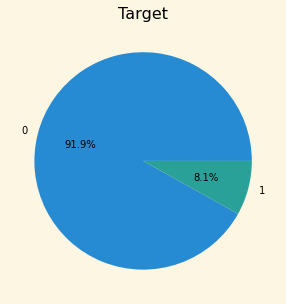

In [40]:
plt.style.use('Solarize_Light2')
count = dr['TARGET'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index, autopct='%1.1f%%')
plt.title("Target")
plt.show()

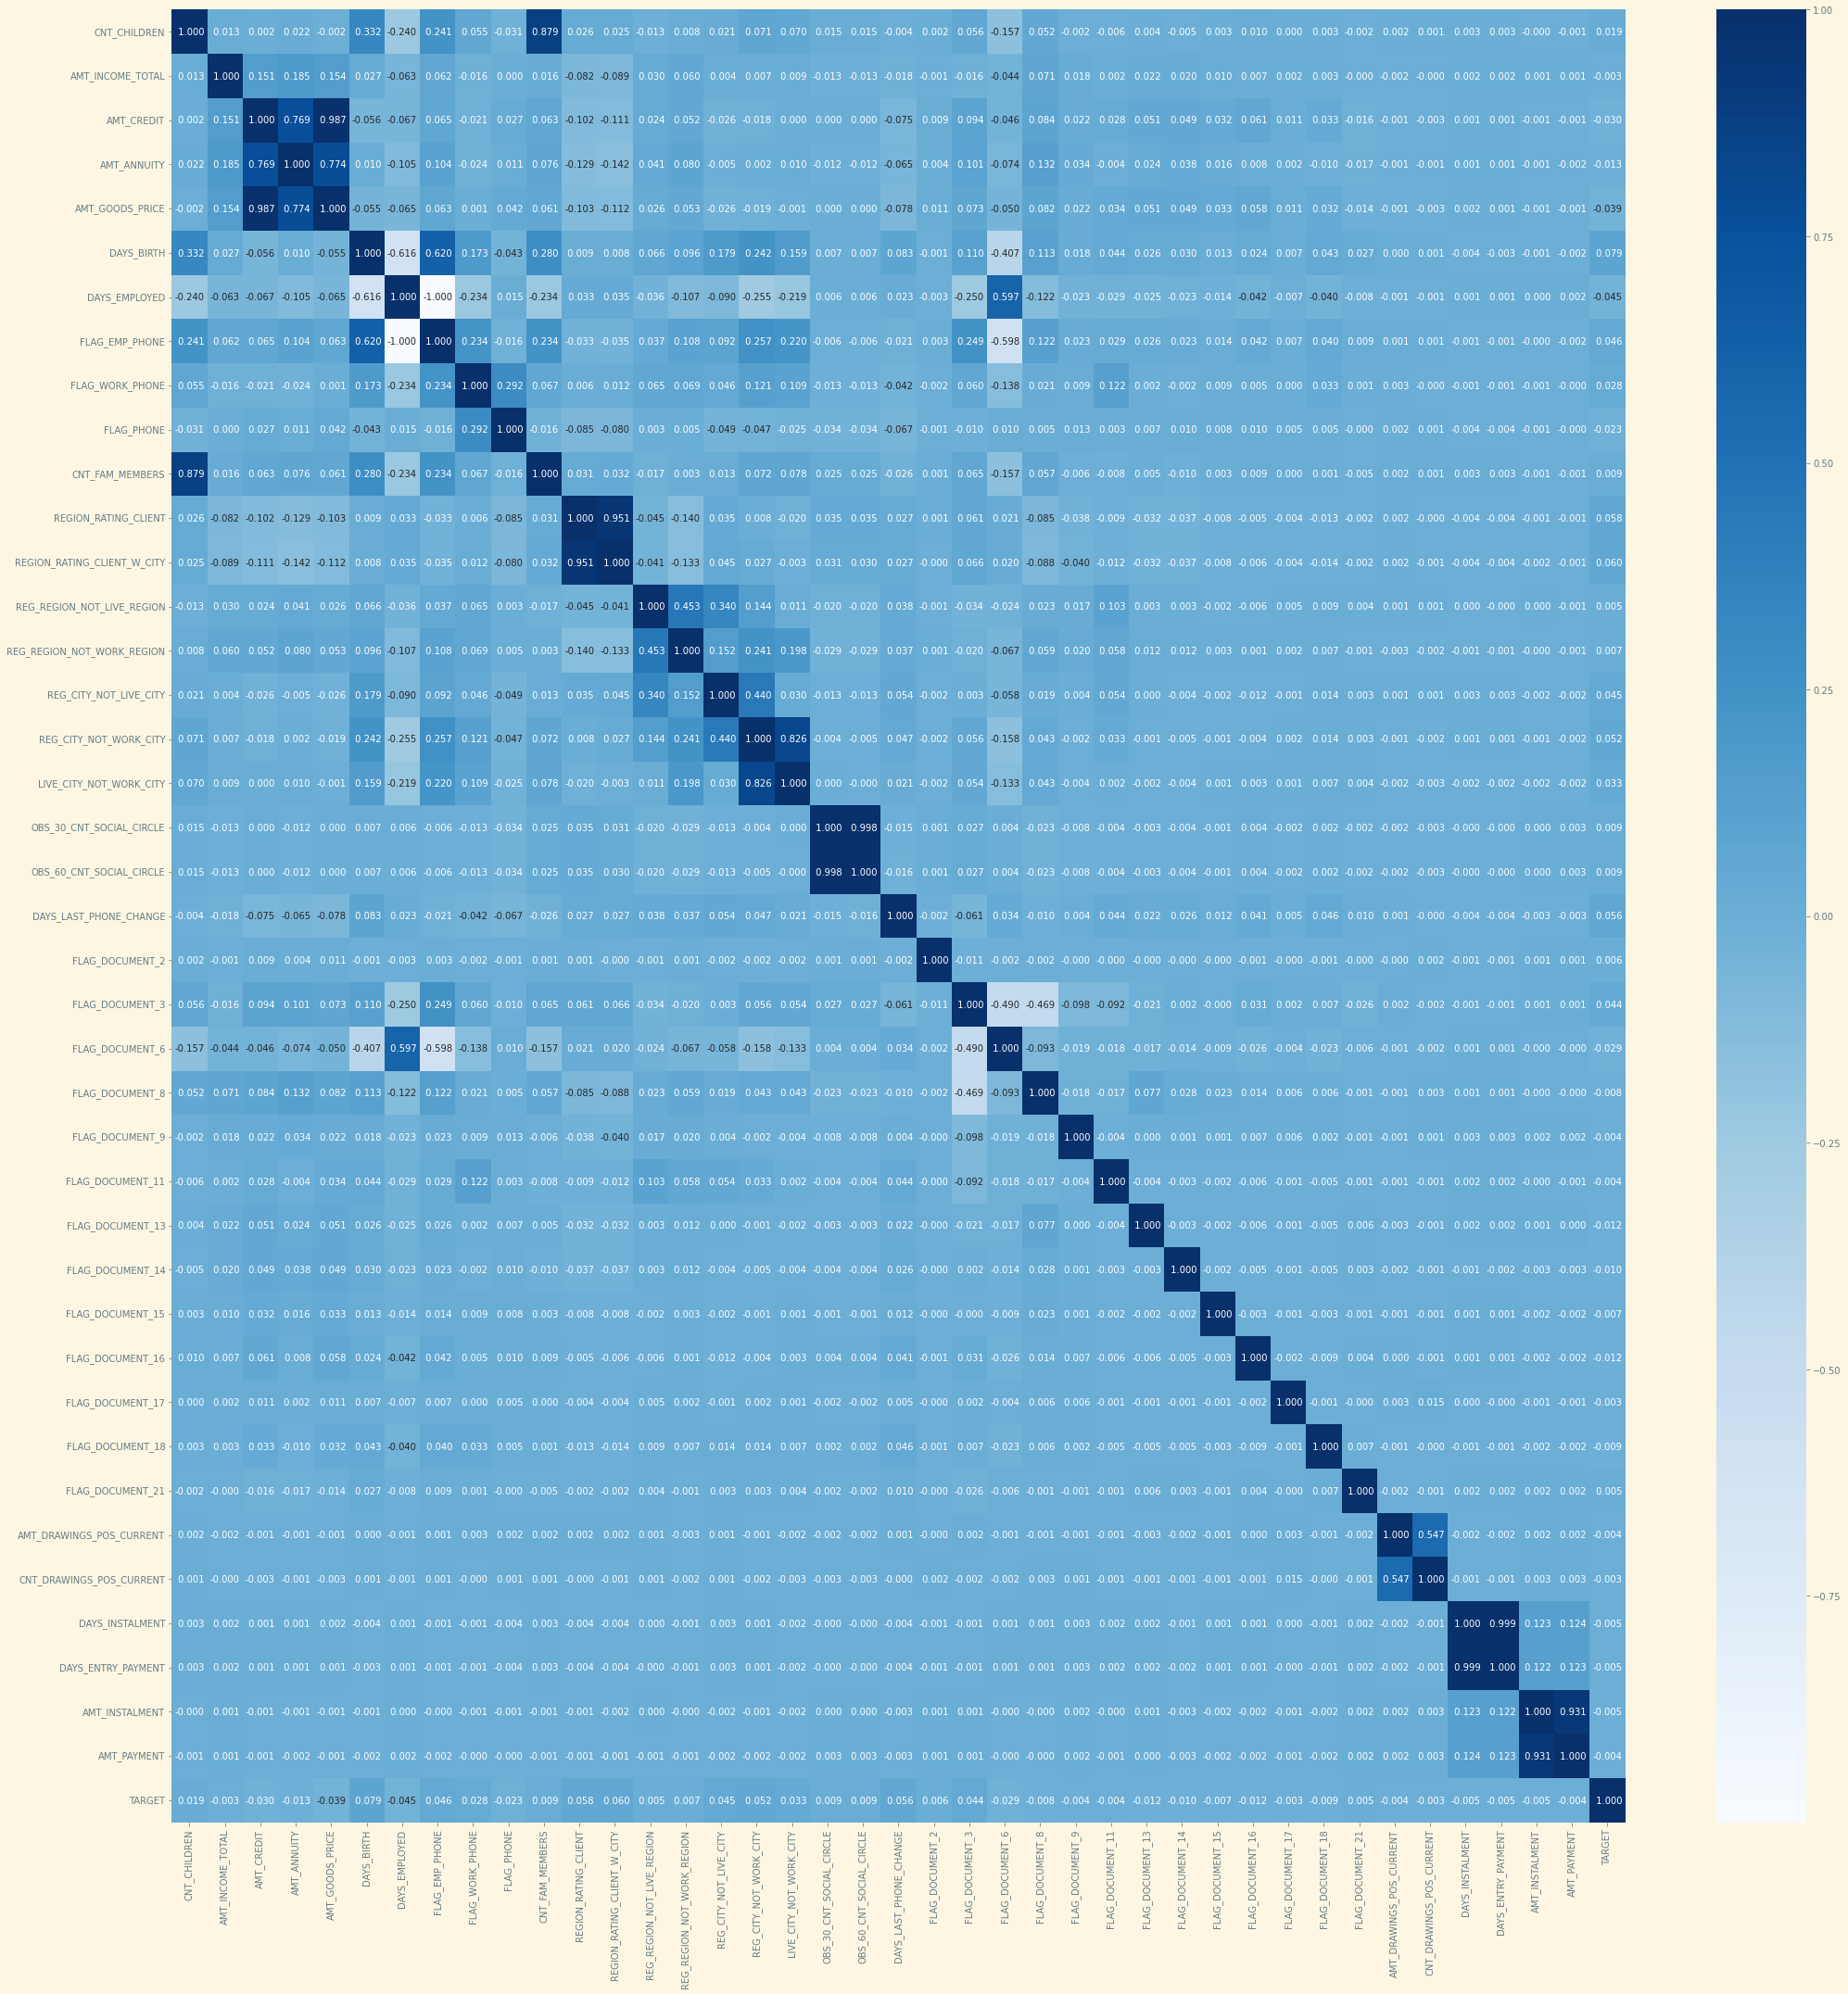

In [39]:
# Heatmaps
plt.figure(figsize=(30,30))
sns.heatmap(dr.corr(), cmap="Blues", annot=True, fmt=' .3f')
plt.tight_layout()

In [11]:
drop_redundan = ['CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_CREDIT','REGION_RATING_CLIENT_W_CITY',
                 'LIVE_CITY_NOT_WORK_CITY','DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT','AMT_PAYMENT']

Preprocesing Data

In [12]:
# Drop Redundant Column
data_prep = dr.copy()
data_prep = data_prep.drop(drop_redundan, axis=1)

In [13]:
# Split Target dan Feature
Y = data_prep['TARGET'] # ---- Target Column
X = data_prep.drop('TARGET', axis=1) # ---- Feature Column
num_col_X = X.select_dtypes(include='number').columns

In [14]:
# Handling Missing Value
data_prep.isna().any().sum()

0

In [15]:
# Handling Duplicate Data
data_prep[data_prep.duplicated(keep=False)]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE,TARGET


In [16]:
# Handling Outlier
for j in num_col_X:
    Q1 = data_prep[j].quantile(0.25)
    Q3 = data_prep[j].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    filter_nonoutlier = (data_prep[j] >= lower) & (data_prep[j] <= upper)
    data_prep_nonout = data_prep[filter_nonoutlier]
data_prep_nonout.head()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE,TARGET
0,0,"202,500.00","351,000.00",-9461,-637,1,0,1,2,0,0,0,0,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,877.50,1.00,"6,948.36",Cash loans,N,Y,Working,Closed,1
1,0,"270,000.00","1,129,500.00",-16765,-1188,1,0,1,1,0,0,0,0,1.00,1.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"1,716.53",Cash loans,N,N,State servant,Active,0
2,0,"67,500.00","135,000.00",-19046,-225,1,1,1,2,0,0,0,0,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"25,425.00",Revolving loans,Y,Y,Working,Active,0
3,0,"121,500.00","513,000.00",-19932,-3038,1,0,0,2,0,0,0,1,0.00,0.00,"-1,106.00",0,0,0,1,0,0,0,0,0,0,0,0,0,"11,547.00",1.00,"2,165.04",Cash loans,N,Y,Working,Active,0
4,0,"99,000.00","454,500.00",-16941,-1588,1,1,1,2,0,0,0,0,0.00,0.00,"-2,536.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"5,970.38",Cash loans,N,Y,State servant,Active,0


In [17]:
# Split Target dan Feature
Y1 = data_prep_nonout['TARGET'] # ---- Target Column
X1 = data_prep_nonout.drop('TARGET', axis=1) # ---- Feature Column

In [46]:
# Train Test Split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1, Y1, test_size=0.3, random_state=42)
print('number of feature rows and columns for train dataset (Xtrain):', Xtrain.shape)
print('number of feature rows and columns for train dataset (Ytrain):', Ytrain.shape)
print('number of feature rows and columns for train dataset (Xtest):', Xtest.shape)
print('number of feature rows and columns for train dataset (Ytest):', Ytest.shape)

number of feature rows and columns for train dataset (Xtrain): (183557, 37)
number of feature rows and columns for train dataset (Ytrain): (183557,)
number of feature rows and columns for train dataset (Xtest): (78668, 37)
number of feature rows and columns for train dataset (Ytest): (78668,)


In [44]:
# Feature Transformation
from sklearn.preprocessing import StandardScaler

Xtrain_nor = Xtrain.copy()
Xtest_nor = Xtest.copy()
for k in num_col_X:
    Xtrain_nor[k] = StandardScaler().fit_transform(Xtrain_nor[k].values.reshape(len(Xtrain_nor),1))
    Xtest_nor[k] = StandardScaler().fit_transform(Xtest_nor[k].values.reshape(len(Xtest_nor),1))

In [45]:
# Feature Encoding
map_NAME_CONTRACT_TYPE = {'Cash loans':0,'Revolving loans':1}
map_FLAG_OWN_CAR = {'N':0,'Y':1}
map_FLAG_OWN_REALTY = {'N':0,'Y':1}
map_CREDIT_ACTIVE = {'Bad debt':0,'Sold':1,'Closed':2,'Active':3}
map_NAME_INCOME_TYPE = {'Unemployed':0,'Maternity leave':1,'Pensioner':2,'Student':3,
                       'Working':4,'State servant':5,'Commercial associate':6,'Businessman':7}

Xtrain_nor['NAME_CONTRACT_TYPE'] = Xtrain_nor['NAME_CONTRACT_TYPE'].map(map_NAME_CONTRACT_TYPE)
Xtrain_nor['FLAG_OWN_CAR'] = Xtrain_nor['FLAG_OWN_CAR'].map(map_FLAG_OWN_CAR)
Xtrain_nor['FLAG_OWN_REALTY'] = Xtrain_nor['FLAG_OWN_REALTY'].map(map_FLAG_OWN_REALTY)
Xtrain_nor['CREDIT_ACTIVE'] = Xtrain_nor['CREDIT_ACTIVE'].map(map_CREDIT_ACTIVE)
Xtrain_nor['NAME_INCOME_TYPE'] = Xtrain_nor['NAME_INCOME_TYPE'].map(map_NAME_INCOME_TYPE)

Xtest_nor['NAME_CONTRACT_TYPE'] = Xtest_nor['NAME_CONTRACT_TYPE'].map(map_NAME_CONTRACT_TYPE)
Xtest_nor['FLAG_OWN_CAR'] = Xtest_nor['FLAG_OWN_CAR'].map(map_FLAG_OWN_CAR)
Xtest_nor['FLAG_OWN_REALTY'] = Xtest_nor['FLAG_OWN_REALTY'].map(map_FLAG_OWN_REALTY)
Xtest_nor['CREDIT_ACTIVE'] = Xtest_nor['CREDIT_ACTIVE'].map(map_CREDIT_ACTIVE)
Xtest_nor['NAME_INCOME_TYPE'] = Xtest_nor['NAME_INCOME_TYPE'].map(map_NAME_INCOME_TYPE)

In [21]:
# Class Imbalance 
from imblearn import under_sampling, over_sampling
Xtrain_os, Ytrain_os = over_sampling.SMOTE().fit_resample(Xtrain_nor, Ytrain)

In [22]:
Xtrain_os.sample(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE
221353,-0.58,0.19,0.98,0.53,-0.49,0.47,-0.50,1.60,-0.10,-0.12,-0.23,-0.29,-0.55,-0.47,-0.47,-1.00,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.83,0,1,1,5,2
312244,-0.58,-0.11,-0.24,0.80,-0.48,0.47,-0.50,-0.63,-0.17,-0.12,-0.23,-0.29,1.83,-0.61,-0.61,1.17,-0.01,-1.57,-0.31,3.35,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.08,0,1,1,4,2
184225,-0.58,-0.11,-1.29,1.59,-0.46,0.47,2.00,1.60,-0.10,-0.12,-0.23,-0.29,-0.55,-0.61,-0.61,0.41,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,0.18,0,0,0,4,3
313860,-0.58,-0.18,-0.70,-0.28,-0.47,0.47,-0.50,-0.63,-0.10,-0.12,-0.23,-0.29,-0.55,-0.21,-0.20,-0.46,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-1.19,0,0,1,6,3
298963,-0.58,0.02,0.08,1.59,-0.46,0.47,2.00,0.44,-0.10,-0.12,-0.23,3.44,1.83,-0.61,-0.61,-0.55,-0.01,-1.57,-0.31,3.35,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.45,0,0,0,5,2


In [23]:
Xtest_norm.sample(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE
178237,-0.58,-0.55,-0.19,-1.74,-0.56,0.47,-0.50,-0.62,-0.10,-0.13,-0.23,-0.29,-0.55,-0.61,-0.61,-0.06,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,0.15,0,0,0,6,3
186731,-0.58,-0.33,-0.23,-1.66,2.14,-2.14,-0.50,1.60,-0.10,-0.13,-0.23,-0.29,-0.55,-0.61,-0.61,-0.59,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,0.14,0,1,0,2,2
62840,-0.58,-1.00,-0.91,-1.47,2.14,-2.14,-0.50,-0.62,-0.10,-0.13,-0.23,-0.29,-0.55,-0.18,-0.18,-0.91,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,-0.52,0,0,1,2,2
180085,-0.58,0.33,0.98,-0.77,-0.47,0.47,-0.50,-0.62,1.86,-0.13,-0.23,-0.29,-0.55,-0.61,-0.61,1.17,-0.01,-1.58,-0.31,3.36,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,-1.17,0,1,0,4,2
234440,-0.58,-0.55,1.59,0.38,-0.48,0.47,2.00,-0.62,1.86,-0.13,-0.23,-0.29,-0.55,-0.18,-0.18,-0.67,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,-0.16,0,0,1,4,2


In [24]:
Ytrain_os.sample(5)

114595    0
289567    1
222320    1
192760    1
25576     0
Name: TARGET, dtype: int64

In [25]:
Ytest.sample(5)

177855    0
37961     0
247581    0
132720    0
260576    0
Name: TARGET, dtype: int64

In [26]:
Ytrain_os.value_counts()

0    168602
1    168602
Name: TARGET, dtype: int64

Machine Learning Model

Log Regresion Model

Evalation Matrix:

Accuracy Test: 0.609
Accuracy Train: 0.626
------------------------------------------------------------
AUC Score Test: 0.598
AUC Score Train: 0.626
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.61      0.74     72292
           1       0.12      0.59      0.20      6376

    accuracy                           0.61     78668
   macro avg       0.53      0.60      0.47     78668
weighted avg       0.88      0.61      0.70     78668

------------------------------------------------------------
Confusion Matrix:



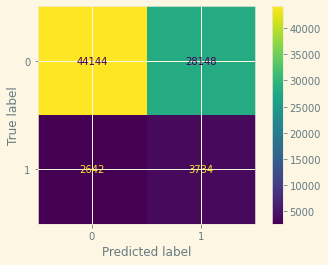

{'C': 1e-05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, f1_score, recall_score, confusion_matrix, roc_auc_score

def evaluation(model):
    Y_pred = model.predict(Xtest_norm)
    Y_pred_train = model.predict(Xtrain_os)
    
    print('Evalation Matrix:\n')
    print('Accuracy Test:', accuracy_score(Ytest, Y_pred).round(3))
    print('Accuracy Train:', accuracy_score(Ytrain_os, Y_pred_train).round(3))
    print('----------' * 6)
    print('AUC Score Test:', roc_auc_score(Ytest, Y_pred).round(3))
    print('AUC Score Train:', roc_auc_score(Ytrain_os, Y_pred_train).round(3))
    print('----------' * 6)
    print('Classification Report:\n', classification_report(Ytest, Y_pred))
    print('----------' * 6)
    print('Confusion Matrix:\n')
    cm = confusion_matrix(Ytest, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    #print('Confusion Matrix:\n', confusion_matrix(Ytest, Y_pred))

model_lr = LogisticRegression(penalty='l2', solver='lbfgs', C=0.00001, random_state=42) #'newton-cg','sag', 'saga', C=0.00001
model_lr.fit(Xtrain_os, Ytrain_os)
evaluation(model_lr)
print(model_lr.get_params(deep=True))

Evalation Matrix:

Accuracy Test: 0.611
Accuracy Train: 0.666
------------------------------------------------------------
AUC Score Test: 0.575
AUC Score Train: 0.666
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.62      0.74     72292
           1       0.11      0.53      0.18      6376

    accuracy                           0.61     78668
   macro avg       0.52      0.58      0.46     78668
weighted avg       0.87      0.61      0.70     78668

------------------------------------------------------------
Confusion Matrix:



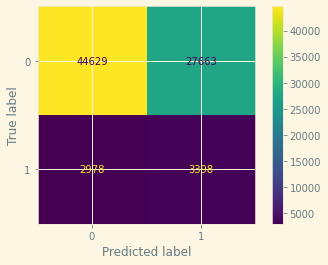

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto',min_samples_split=10, random_state=44)
rf_model.fit(Xtrain_os, Ytrain_os)
evaluation(rf_model)

The Best Model

In [41]:
model = {'Model Name':['Logistic Regression', 'Random Forest'], 'Accuracy':[0.609,0.611], 
     'Roc_Auc':[0.598,0.575], 'The Best Model':['The Best','Not The Best']}
evaluasi = pd.DataFrame(model).set_index('Model Name')
evaluasi

,Accuracy,Roc_Auc,The Best Model
Model Name,,,
Logistic Regression,0.61,0.60,The Best
Random Forest,0.61,0.57,Not The Best


Importance of Feauture 

In [33]:
B0 = model_lr.intercept_
B1 = model_lr.coef_[0]
print('Nilai Intercep:', B0.round(2))
print('Coef Regression:', B1.round(2))
Reg = pd.DataFrame({'Feature':Xtrain_os.columns, 'Coef_Regression':B1}, index=None)
Reg = Reg.sort_values('Coef_Regression', ascending=False)
Reg

Nilai Intercep: [0.41]
Coef Regression: [-0.   -0.   -0.07  0.11 -0.04  0.04  0.03 -0.04  0.08 -0.01  0.    0.04
  0.05 -0.   -0.    0.1   0.01  0.07 -0.01  0.01  0.   -0.01 -0.02 -0.02
 -0.01 -0.02 -0.01 -0.02  0.01 -0.01 -0.01 -0.01 -0.04 -0.1  -0.06 -0.05
 -0.08]


,Feature,Coef_Regression
3,DAYS_BIRTH,0.11
15,DAYS_LAST_PHONE_CHANGE,0.10
8,REGION_RATING_CLIENT,0.08
17,FLAG_DOCUMENT_3,0.07
12,REG_CITY_NOT_WORK_CITY,0.05
5,FLAG_EMP_PHONE,0.04
11,REG_CITY_NOT_LIVE_CITY,0.04
6,FLAG_WORK_PHONE,0.03
16,FLAG_DOCUMENT_2,0.01
28,FLAG_DOCUMENT_21,0.01


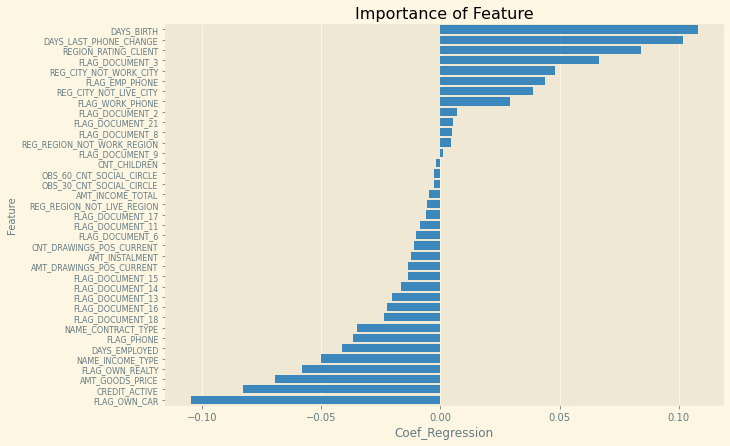

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(x=Reg['Coef_Regression'],y=Reg['Feature'])
plt.title('Importance of Feature')
plt.ylabel('Feature', size=10)
plt.yticks(size=8)
plt.show()